What’s the breakdown of genres for the movies that were rated?

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/workspaces/ds-fall-2025-wed-AA/Week-03-EDA-and-Dashboards/data/movie_ratings.csv")

df_exploded = df.assign(genres=df["genres"].str.split("|")).explode("genres")


In [7]:
genre_counts = (
    df_exploded["genres"]
    .value_counts()
    .rename_axis("genre")
    .reset_index(name="count")
)


display(genre_counts.head(10))

,genre,count
0,Drama,39895
1,Comedy,29832
2,Action,25589
3,Thriller,21872
4,Romance,19461
5,Adventure,13753
6,Sci-Fi,12730
7,War,9398
8,Crime,8055
9,Children,7182


/tmp/ipykernel_19400/2943101009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gc, y="genre", x="count", palette="magma", ax=ax)


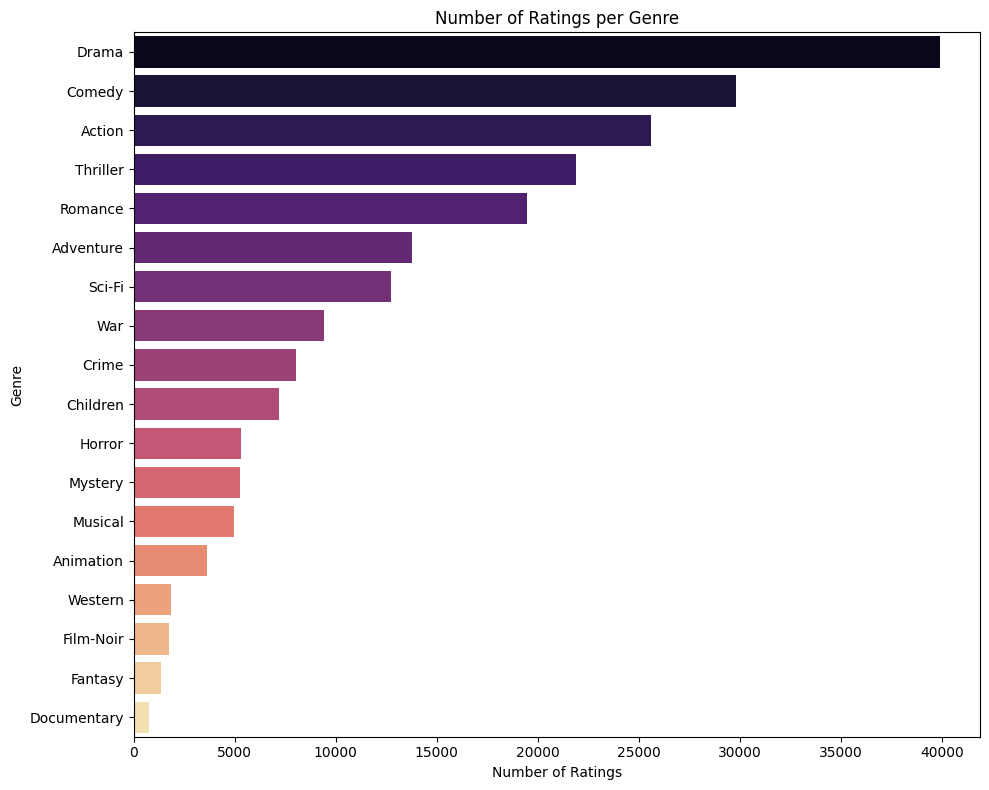

In [8]:

gc = genre_counts[genre_counts["genre"] != "unknown"].sort_values("count", ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=gc, y="genre", x="count", palette="magma", ax=ax)

ax.set_title("Number of Ratings per Genre")
ax.set_xlabel("Number of Ratings")
ax.set_ylabel("Genre")

plt.tight_layout()
plt.show()



Which genres have the highest viewer satisfaction (highest ratings)?


In [13]:
# group by genre → get mean rating + number of ratings
genre_stats = (
    df_exploded
    .groupby("genres")["rating"]
    .agg(avg_rating="mean", num_ratings="count")
    .reset_index()
)



In [28]:
min_ratings = 40
filtered = genre_stats[genre_stats["num_ratings"] >= min_ratings]

display(filtered.sort_values("avg_rating", ascending=False).head(10))



,genres,avg_rating,num_ratings
9,Film-Noir,3.921523,1733
16,War,3.815812,9398
7,Drama,3.687379,39895
6,Documentary,3.672823,758
12,Mystery,3.638132,5245
5,Crime,3.632278,8055
13,Romance,3.621705,19461
17,Western,3.613269,1854
2,Animation,3.576699,3605
14,Sci-Fi,3.560723,12730


/tmp/ipykernel_19400/1436458851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gc, y="genres", x="avg_rating", palette="mako", ax=ax)


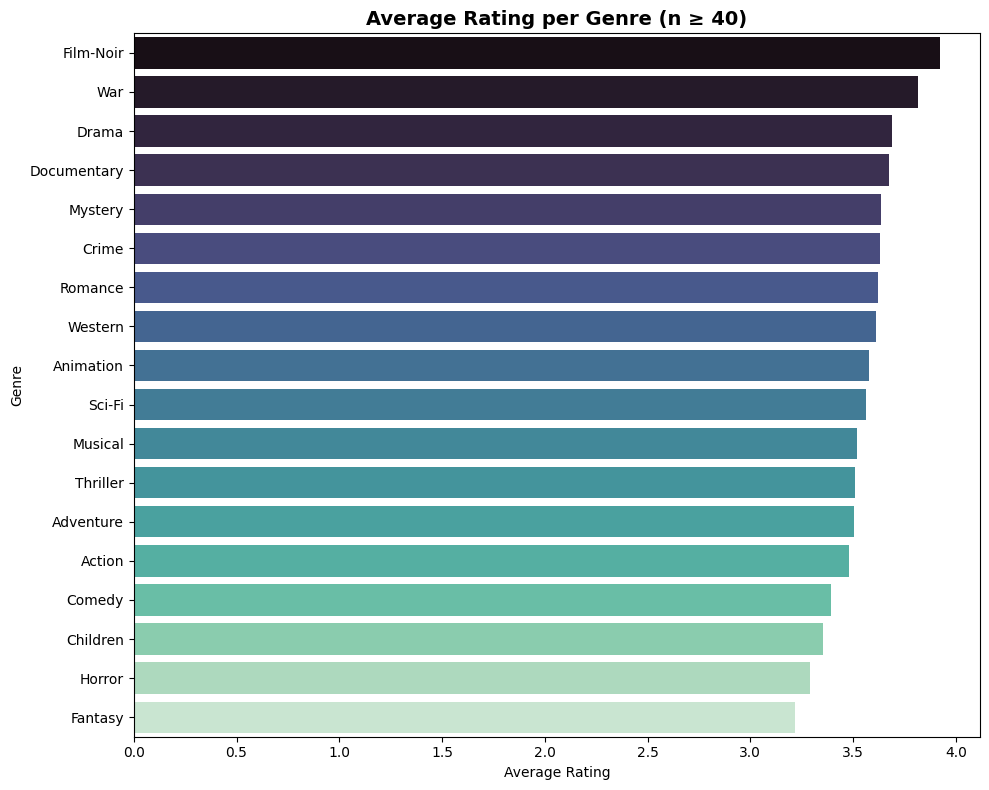

In [29]:
gc = filtered.sort_values("avg_rating", ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=gc, y="genres", x="avg_rating", palette="mako", ax=ax)

ax.set_title(f"Average Rating per Genre (n ≥ {min_ratings})", fontsize=14, fontweight="bold")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Genre")

plt.tight_layout()
plt.show()



We want to see if movies released in different years get rated differently → plot average rating vs release year.

In [31]:
year_stats = (
    df.groupby("year")["rating"]
      .agg(avg_rating="mean", n="count")
      .reset_index()
      .sort_values("year")
)

display(year_stats.head(10))



,year,avg_rating,n
0,1922.0,3.555556,54
1,1926.0,3.000000,2
2,1930.0,3.777778,18
3,1931.0,4.000000,132
4,1932.0,3.833333,24
5,1933.0,3.983957,187
6,1934.0,4.000000,191
7,1935.0,3.917160,169
8,1936.0,3.769231,39
9,1937.0,3.723510,604


In [33]:
MIN_N = 100  # adjust if you want stricter/looser filtering
year_f = year_stats[year_stats["n"] >= MIN_N].copy()
display(year_f.head(10))  # preview after filter


,year,avg_rating,n
3,1931.0,4.000000,132
5,1933.0,3.983957,187
6,1934.0,4.000000,191
7,1935.0,3.917160,169
9,1937.0,3.723510,604
10,1938.0,3.870849,271
11,1939.0,4.000000,1689
12,1940.0,3.855946,1194
13,1941.0,3.900452,884
14,1942.0,4.398467,783


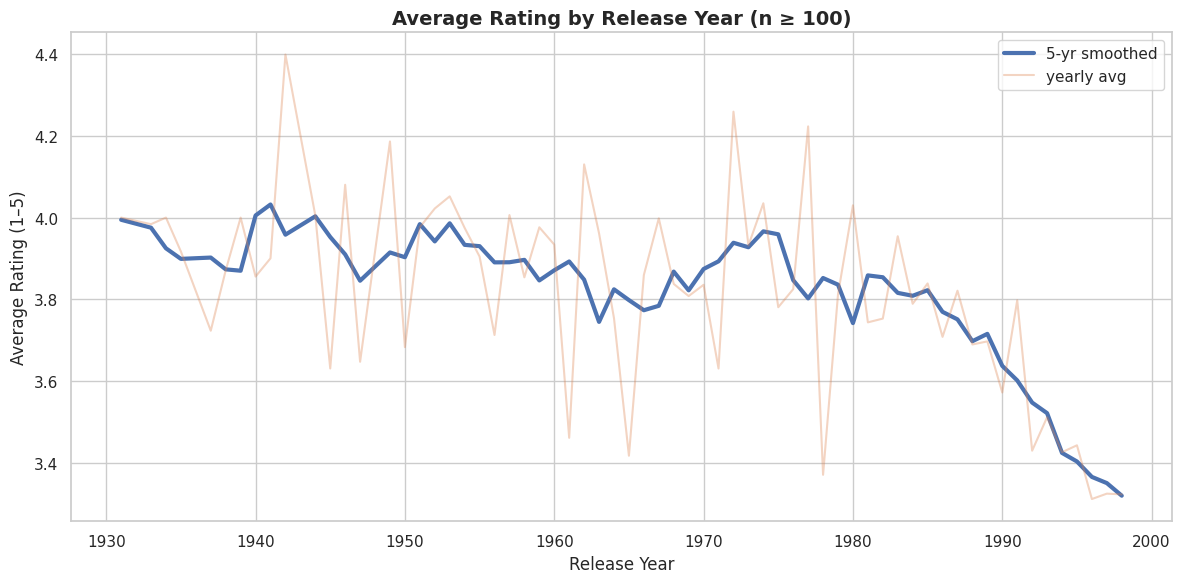

In [35]:
sns.set_theme(style="whitegrid")

year_f["smooth"] = year_f["avg_rating"].rolling(5, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=year_f, x="year", y="smooth", linewidth=3, label="5-yr smoothed", ax=ax)

sns.lineplot(data=year_f, x="year", y="avg_rating", alpha=0.35, linewidth=1.5, label="yearly avg", ax=ax)

ax.set_title(f"Average Rating by Release Year (n ≥ {MIN_N})", fontsize=14, fontweight="bold")
ax.set_xlabel("Release Year")
ax.set_ylabel("Average Rating (1–5)")

plt.tight_layout()
plt.show()



Q4: What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

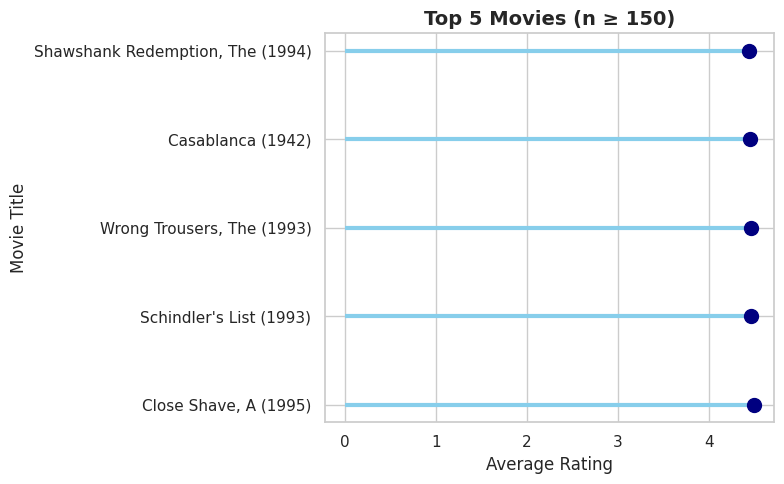

In [46]:
# pick one threshold, say ≥150
top150 = (
    movie_stats[movie_stats["num_ratings"] >= 150]
    .sort_values(["avg_rating", "num_ratings"], ascending=[False, False])
    .head(5)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hlines(y=top150["title"], xmin=0, xmax=top150["avg_rating"], color="skyblue", linewidth=3)
ax.plot(top150["avg_rating"], top150["title"], "o", markersize=10, color="navy")

ax.set_title("Top 5 Movies (n ≥ 150)", fontsize=14, fontweight="bold")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Movie Title")

plt.tight_layout()
plt.show()



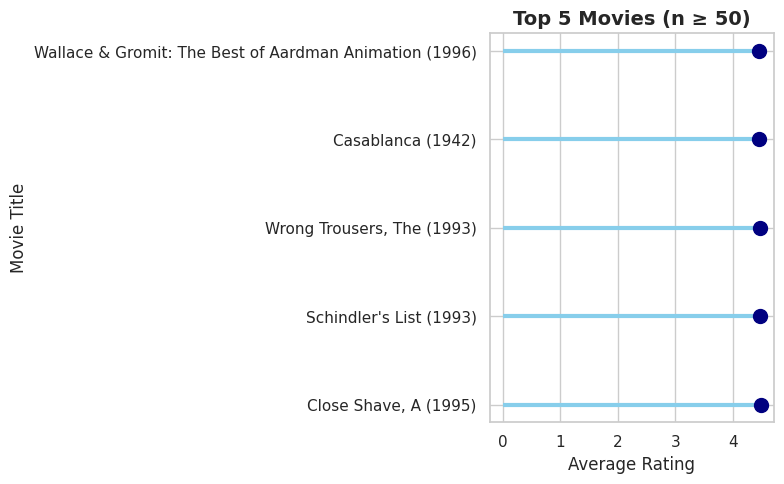

In [47]:
# pick one threshold, say ≥150
top150 = (
    movie_stats[movie_stats["num_ratings"] >= 50]
    .sort_values(["avg_rating", "num_ratings"], ascending=[False, False])
    .head(5)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hlines(y=top150["title"], xmin=0, xmax=top150["avg_rating"], color="skyblue", linewidth=3)
ax.plot(top150["avg_rating"], top150["title"], "o", markersize=10, color="navy")

ax.set_title("Top 5 Movies (n ≥ 50)", fontsize=14, fontweight="bold")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Movie Title")

plt.tight_layout()
plt.show()
